# Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
dia_healthcare= pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
dia_healthcare.head() #showing the rows of the dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
dia_healthcare.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Evaluating the null values of the dataset

In [5]:
dia_healthcare.isnull().sum() #null values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
dia_healthcare.duplicated().sum()   #determining the duplicate values in the dataset

3854

In [7]:
dia_healthcare.drop_duplicates(inplace=True)  #dropping the duplicate values

# Data visualisation 

<Axes: xlabel='diabetes', ylabel='count'>

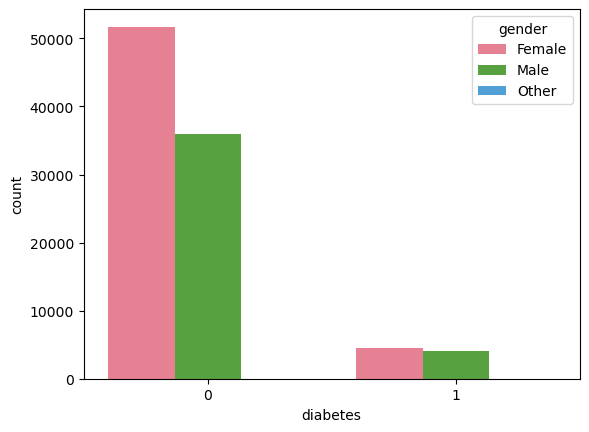

In [8]:
sns.countplot(x ='diabetes', hue = "gender", data = dia_healthcare, palette="husl") #count plot

(array([3255., 2876., 2618., 1577., 2572., 2811., 2111., 3581., 3555.,
        2397., 3821., 3665., 2408., 3654., 4143., 2576., 4186., 4471.,
        2880., 4540., 4294., 2803., 4112., 3584., 2267., 2929., 2540.,
        1556., 2155., 6209.]),
 array([ 0.08 ,  2.744,  5.408,  8.072, 10.736, 13.4  , 16.064, 18.728,
        21.392, 24.056, 26.72 , 29.384, 32.048, 34.712, 37.376, 40.04 ,
        42.704, 45.368, 48.032, 50.696, 53.36 , 56.024, 58.688, 61.352,
        64.016, 66.68 , 69.344, 72.008, 74.672, 77.336, 80.   ]),
 <BarContainer object of 30 artists>)

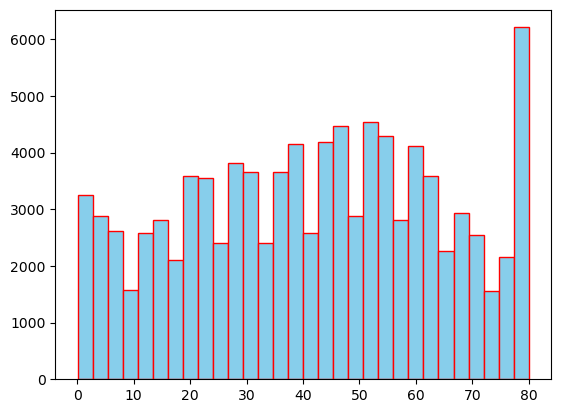

In [9]:
plt.hist(dia_healthcare["age"], bins=30, color='skyblue', edgecolor='red')  #age distribution

<Axes: xlabel='age', ylabel='bmi'>

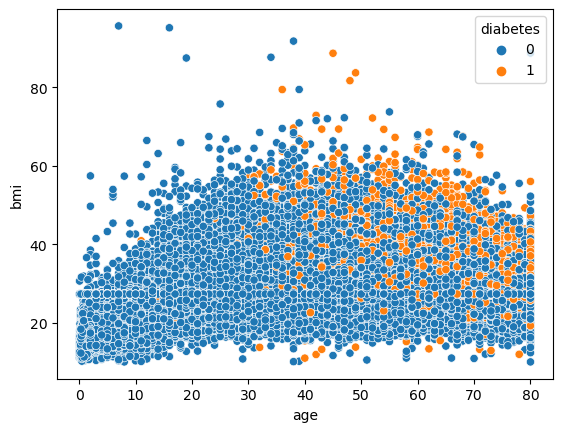

In [10]:
sns.scatterplot(x="age",
                    y="bmi",
                    hue="diabetes",
                    data=dia_healthcare)   #relationship between age and bmi based on diabetes variable

<Axes: xlabel='smoking_history', ylabel='count'>

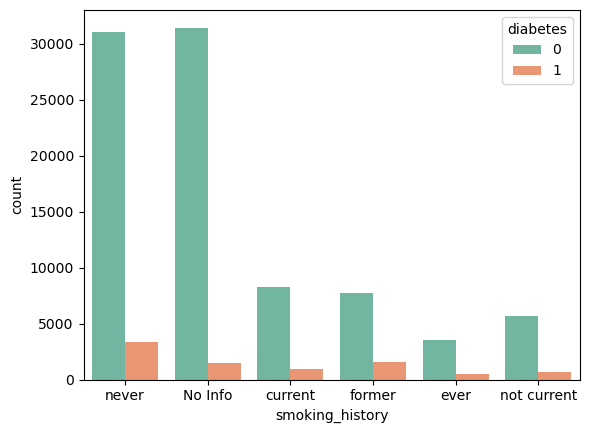

In [11]:
sns.countplot(x ='smoking_history', hue = "diabetes", data = dia_healthcare, palette="Set2")   #analysing the smoking history based on diabetes variable

# Data preprocessing 

In [12]:
from sklearn import preprocessing 
label_encoder_healthcare = preprocessing.LabelEncoder()
dia_healthcare['gender']= label_encoder_healthcare.fit_transform(dia_healthcare['gender']) 
dia_healthcare['smoking_history']= label_encoder_healthcare.fit_transform(dia_healthcare['smoking_history']) 

<Axes: >

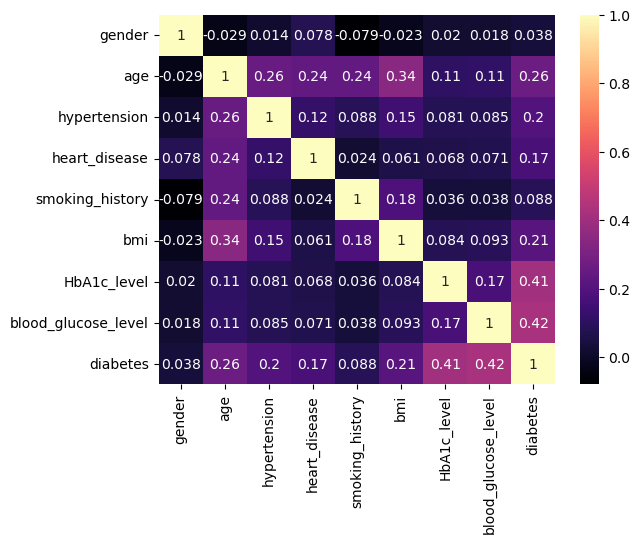

In [13]:
sns.heatmap(dia_healthcare.corr(), cmap="magma", annot=True) #heatmap for evaluating the correlation

In [14]:
#splitting the dataset
X = dia_healthcare.iloc[:, :-1]
y = dia_healthcare.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
from sklearn.ensemble import RandomForestClassifier   #random forest classifier
clf_healthcare=RandomForestClassifier(n_estimators = 100)  
clf_healthcare.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred_random = clf_healthcare.predict(X_test) #predicted value based on the random forest classifier model

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
score = accuracy_score(y_test, y_pred_random) #accuracy
print("Accuracy of the Random forest classifier is:", score)

Accuracy of the Random forest classifier is: 0.9672172068061738


In [18]:
class_random=classification_report(y_test, y_pred_random) #classification report
print(class_random)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21877
           1       0.94      0.68      0.79      2160

    accuracy                           0.97     24037
   macro avg       0.95      0.84      0.89     24037
weighted avg       0.97      0.97      0.96     24037



In [19]:
confusion_matrix(y_test, y_pred_random) #confusion matrix

array([[21781,    96],
       [  692,  1468]], dtype=int64)

In [20]:
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
KNN_healthcare = KNeighborsClassifier(n_neighbors=4)
KNN_healthcare.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [21]:
y_pred_knn= KNN_healthcare.predict(X_test) #predicted value

In [22]:
score_knn = accuracy_score(y_test, y_pred_knn) #accuracy
print("Accuracy of the KNNr is:", score_knn)

Accuracy of the KNNr is: 0.9506594000915256


In [23]:
class_knn=classification_report(y_test, y_pred_knn) #classification report
print(class_knn)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     21877
           1       0.93      0.49      0.64      2160

    accuracy                           0.95     24037
   macro avg       0.94      0.74      0.81     24037
weighted avg       0.95      0.95      0.94     24037



In [24]:
confusion_matrix(y_test, y_pred_knn) #confusion matrix

array([[21800,    77],
       [ 1109,  1051]], dtype=int64)

# ROC curve

In [25]:
pred_prob_random = clf_healthcare.predict_proba(X_test)
pred_prob_knn = KNN_healthcare.predict_proba(X_test)

In [26]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_random[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)

In [27]:
from sklearn.metrics import roc_auc_score
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score_random = roc_auc_score(y_test, pred_prob_random[:,1])
auc_score_knn= roc_auc_score(y_test, pred_prob_knn[:,1])
print("AUC score of random forest classifier:", auc_score_random)
print("AUC score of KNN:", auc_score_knn)

AUC score of random forest classifier: 0.9590280211417708
AUC score of KNN: 0.8546169852830386


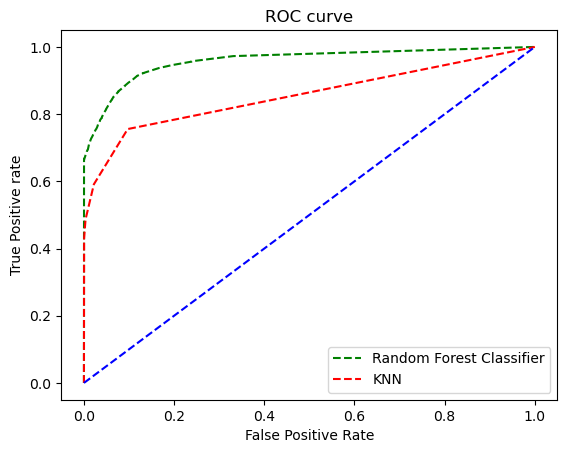

In [28]:
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()